In [ ]:
import pandas as pd

reactions = pd.read_csv("/content/drive/MyDrive/adverse_events.csv")

reactions.head()

,reaction
0,Arthralgia
1,Back pain
2,Blood pressure decreased
3,Blood pressure fluctuation
4,Blood pressure increased


In [ ]:
pt_list = reactions['reaction'].dropna().to_list()

print(len(pt_list))

2838


In [ ]:
from sentence_transformers import SentenceTransformer

# Use a biomedical model for better term understanding
model = SentenceTransformer('pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb')

pt_embeddings = model.encode(pt_list, show_progress_bar=True)

Batches:   0%|          | 0/89 [00:00<?, ?it/s]

In [ ]:
##clustering PTs using kmeans

from sklearn.cluster import KMeans

k = 20  # Try different values based on Silhouette Score
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pt_embeddings)

pt_cluster_df = pd.DataFrame({
    'preferred_term': pt_list,
    'cluster': labels
})

In [ ]:
pt_cluster_df

,preferred_term,cluster
0,Arthralgia,14
1,Back pain,1
2,Blood pressure decreased,9
3,Blood pressure fluctuation,5
4,Blood pressure increased,8
...,...,...
2833,Artificial menopause,4
2834,Noninfective gingivitis,2
2835,Primary biliary cholangitis,17
2836,Therapeutic drug monitoring analysis not perfo...,13


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


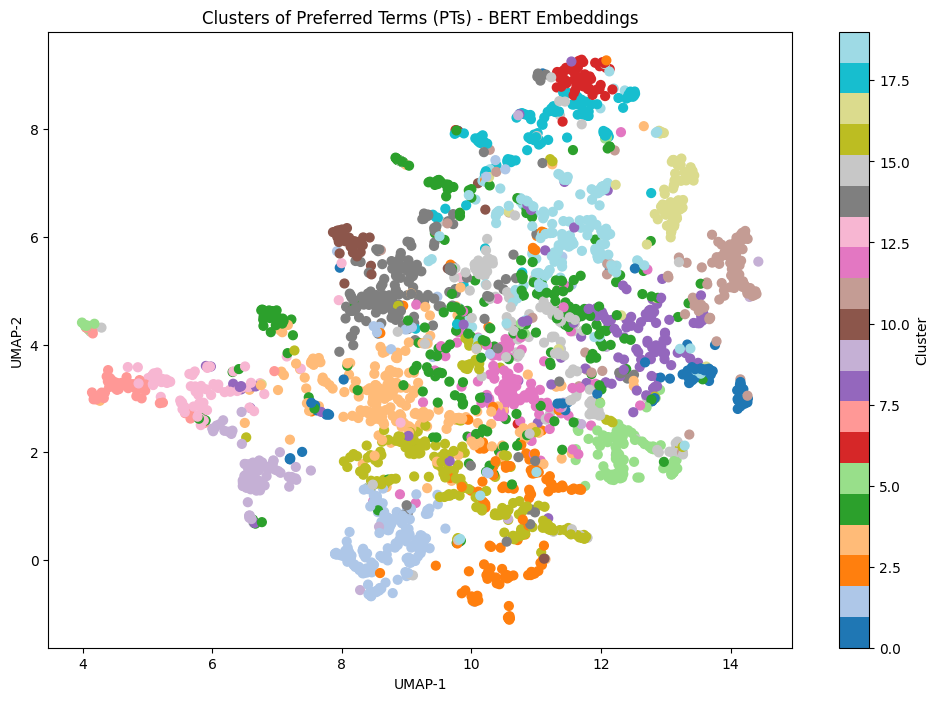

In [ ]:
##Visualize using umap
import umap.umap_ as umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, random_state=42)
embedding_2d = reducer.fit_transform(pt_embeddings)

plt.figure(figsize=(12, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=labels, cmap='tab20', s=40)
plt.title('Clusters of Preferred Terms (PTs) - BERT Embeddings')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
pt_cluster_df.loc[pt_cluster_df['cluster']==1]

,preferred_term,cluster
1,Back pain,1
7,Trigger finger,1
83,Bone disorder,1
88,Osteoarthritis,1
89,Osteonecrosis,1
...,...,...
2712,Pelvic fracture,1
2715,Musculoskeletal injury,1
2773,Foot amputation,1
2783,Radiculopathy,1


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cluster']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cluster'}, axis=1)
              .sort_values('cluster', ascending=True))
  xs = counted['cluster']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster')
_ = plt.ylabel('count()')

In [ ]:
pt_cluster_df.loc[pt_cluster_df['cluster']==2]

,preferred_term,cluster
24,Sputum discoloured,2
53,Nasopharyngitis,2
56,Sinus disorder,2
58,Tooth disorder,2
69,Hypoaesthesia oral,2
...,...,...
2764,Lip oedema,2
2766,Sinus headache,2
2775,Trigeminal neuralgia,2
2806,Lip disorder,2


In [ ]:
len(pt_cluster_df.loc[pt_cluster_df['cluster']==2])

153

In [ ]:
len(pt_cluster_df.loc[pt_cluster_df['cluster']==1])

187